# Stack Exchange Data Analysis Project

Stack Exchange is a network of 176 topic-specific communities. Questions and answers are rated, so good answers rise to the top. Good questions are focused on problems rather than opinions. They can be tagged and categorized. Users can gain reputation by being upvoted, this way knowlewdgable community-members are easily identified. 

We can use <a href="https://data.stackexchange.com/datascience/query/new">Stack Exchange's Data Explorer</a> to gain some insights. The SEDE uses <a href="https://en.wikipedia.org/wiki/Transact-SQL">Transact SQL</a>, which works <a href="https://www.mssqltips.com/sqlservertip/4777/comparing-some-differences-of-sql-server-to-sqlite/">slightly differently</a> than SQLite.
We might look at post score, view count, tags, answer count and favourite count to find out which posts are popular.

We want to limit our analysis on more recent posts, so only posts from 2019 are relevant.

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

q2019 = pd.read_csv("2019_questions.csv")
print(q2019.head(20),q2019.isnull().sum())

       Id         CreationDate  Score  ViewCount  \
0   44419  2019-01-23 09:21:13      1         21   
1   44420  2019-01-23 09:34:01      0         25   
2   44423  2019-01-23 09:58:41      2       1651   
3   44427  2019-01-23 10:57:09      0         55   
4   44428  2019-01-23 11:02:15      0         19   
5   44430  2019-01-23 11:13:32      0        283   
6   44432  2019-01-23 11:17:46      1        214   
7   44436  2019-01-23 12:49:39      0          9   
8   44437  2019-01-23 13:04:11      0          7   
9   44438  2019-01-23 13:16:29      0        584   
10  44439  2019-01-23 13:25:24      0         17   
11  44440  2019-01-23 14:04:25      0         64   
12  44446  2019-01-23 14:55:08      1         73   
13  44448  2019-01-23 15:34:39      2        105   
14  44449  2019-01-23 15:36:41      1       1212   
15  44450  2019-01-23 15:37:08      2        178   
16  44454  2019-01-23 16:56:01      0        204   
17  44456  2019-01-23 17:29:04      2        188   
18  44460  2

### First impressions of the data

The dataframe has 6 columns: CreationDate, Score, ViewCount, Tags, AnswerCount and FavouriteCount. All these columns are complete, except for  FavouriteCount, which has plenty of missing entries. It looks like those missing values are coming from entries, that are not favourited by anyone. We could replace those NaN values with the value 0. It also makes sense to transform the data type from float to integer.
The tags include some special characters. It might be useful to remove those.

In [146]:
q2019["FavoriteCount"] = q2019["FavoriteCount"].fillna(0).astype(int)
q2019['Tags'] = q2019['Tags'].str.replace("^<|>$", "").str.split("><")


print(q2019.head())


      Id         CreationDate  Score  ViewCount  \
0  44419  2019-01-23 09:21:13      1         21   
1  44420  2019-01-23 09:34:01      0         25   
2  44423  2019-01-23 09:58:41      2       1651   
3  44427  2019-01-23 10:57:09      0         55   
4  44428  2019-01-23 11:02:15      0         19   

                                                Tags  AnswerCount  \
0                    [machine-learning, data-mining]            0   
1  [machine-learning, regression, linear-regressi...            0   
2       [python, time-series, forecast, forecasting]            0   
3              [machine-learning, scikit-learn, pca]            1   
4           [dataset, bigdata, data, speech-to-text]            0   

   FavoriteCount  
0              0  
1              0  
2              0  
3              0  
4              0  


                        tag  count
237        machine-learning   2693
132                  python   1814
275           deep-learning   1220
450          neural-network   1055
271                   keras    935
53           classification    685
362              tensorflow    584
153            scikit-learn    540
421                     nlp    493
122                     cnn    489
157             time-series    466
436                    lstm    402
371                  pandas    354
321              regression    347
129                 dataset    340
468                       r    268
82      predictive-modeling    265
396              clustering    257
34               statistics    234
84   machine-learning-model    224


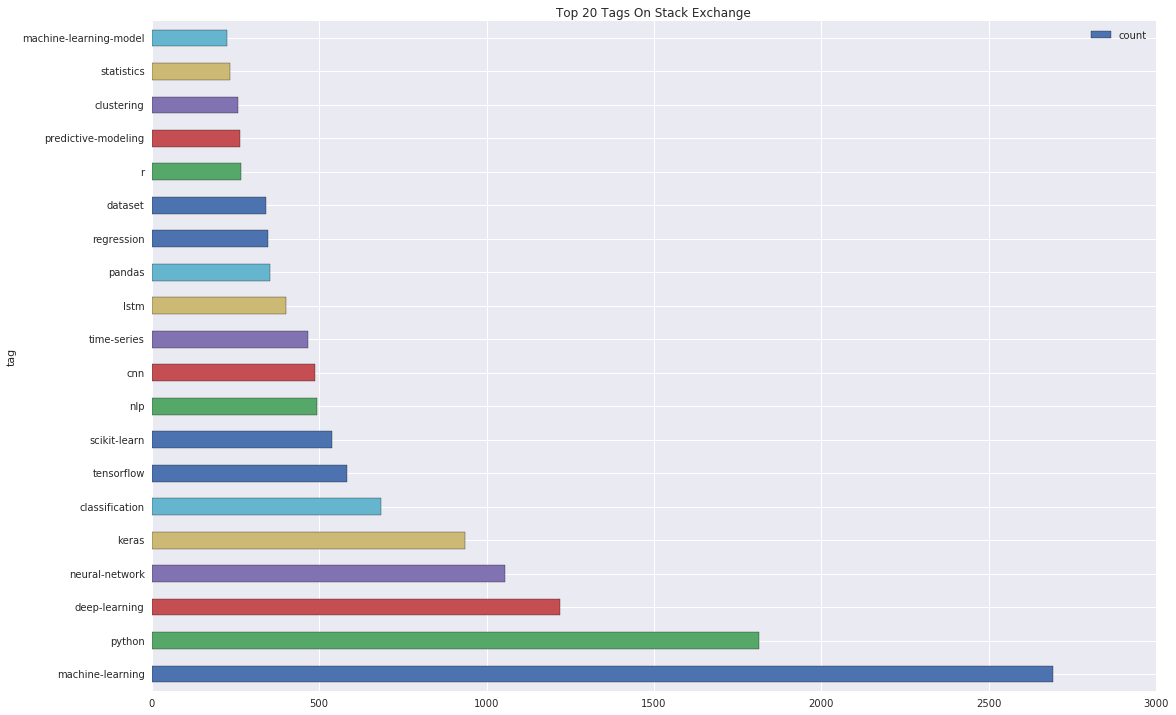

In [147]:
taglist = {}
for t in q2019["Tags"]:
    for tags in t:
        if tags in taglist:
            taglist[tags] += 1
        else:
            taglist[tags] = 1


tagdata = pd.DataFrame.from_dict(taglist, orient="index")
tagdata.reset_index(inplace=True)


tagdata.rename(columns={"index": "tag", 0: "count"}, inplace=True)
tagdata.sort_values(by="count", ascending=False, inplace=True)
top20tags = tagdata.head(20)
print(top20tags)
top20tags.plot(kind="barh", y="count", x="tag", figsize=(18, 12))
plt.title("Top 20 Tags On Stack Exchange")
plt.show()

        



                  tag  count   views
1              python   1814  537585
0    machine-learning   2693  388499
4               keras    935  268608
2       deep-learning   1220  233628
12             pandas    354  201787
3      neural-network   1055  185367
7        scikit-learn    540  128110
6          tensorflow    584  121369
5      classification    685  104457
70          dataframe     81   89352
11               lstm    402   74458
8                 nlp    493   71382
9                 cnn    489   70349
10        time-series    466   64134
47              numpy    117   49767
13         regression    347   49451
14            dataset    340   43151
26            pytorch    175   40240
154               csv     27   38654
17         clustering    257   33928


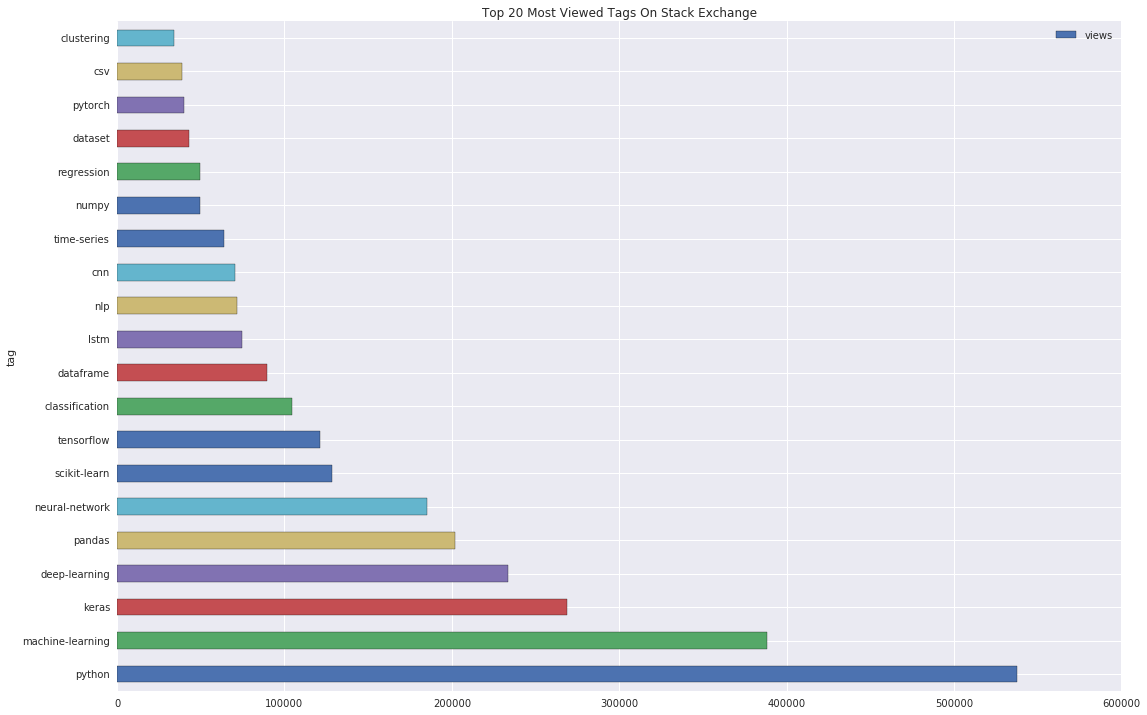

In [148]:
views = {}
for index, row in q2019.iterrows():
    for t in row["Tags"]:
        v = row["ViewCount"]
        if t in views:
            views[t] += v
        else:
            views[t] = v
tags_views = pd.DataFrame.from_dict(views, orient="index")
tags_views.reset_index(inplace=True)
tags_views.rename(columns={"index": "tag", 0: "views"}, inplace=True)
tagdata = tagdata.merge(tags_views, left_on="tag", right_on="tag")
top20views = tagdata.sort_values("views", ascending=False).head(20)
print(top20views)

top20views.plot(kind="barh", y="views", x="tag", figsize=(18, 12))
plt.title("Top 20 Most Viewed Tags On Stack Exchange")
plt.show()


       
                    




The number of tags and the amount of views they got is similar, but not identical. 
The most used tag ("machine-learning") is the 2nd most viewed tag. The 2nd most used tag ("python") is the most viewed tag. 